# Diamonds Analysis - DSIC 100 Project Proposal
###### Group 5: Clare Pan, Wendy Phung, Jessie Sheng, Jason Wang

## Introduction
Diamond is a mineral composed of pure carbon, making its structure very strong. The hardness of diamond and its high dispersion of light makes it useful for industrial applications and desirable as jewelry. Even the smallest difference between two diamonds could make one much more valuable than the other. For this reason, the Gemological Institute of America created a now globally accepted standard for describing diamonds using 4Cs: colour, cut, clarity, and carat weight. This universal measure of diamond quality is used to assess and grade diamonds, allowing diamond customers to better select the diamond they wish to purchase. The colour of a diamond is categorized using a D-Z scale, where D represents colourless and Z represents light yellow. The clarity of a diamond is graded by its purity. A perfectly cut diamond with no hue and impurities would be the most chemically pure and structurally perfect, which would have a higher price. For this project, we will use a data set from Kaggle to predict the diamonds price using the 4Cs as predictors.

<img src="https://raw.githubusercontent.com/cpan0/project_proposal/main/gia%20diamond%20chart.png" width="800" height="800">
(source: https://www.d2ukjewellery.com/diamondgrading)

## Preliminary exploratory data analysis

#### Loading the libraries

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(RColorBrewer)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

#### Reading dataset from web into R

In [2]:
url <- "https://raw.githubusercontent.com/cpan0/project_proposal/main/diamonds.csv"
diamonds <- read_csv(url)
diamonds <- diamonds %>% 
    select(carat, cut, color, clarity, price) %>%   # selecting the necessary variables/columns
    mutate(cut = factor(cut, c("Ideal", "Premium", "Very Good", "Good", "Fair")), # Relevel cut from 'Ideal' to 'Fair'
          clarity = factor(clarity, c("IF", "VVS1", "VVS2", "VS1", "VS2", "SI1", "SI2", "I1"))) # Relevel clarity from 'IF' (internally flawless) to 'I1' (imperfect)
head(diamonds)

Parsed with column specification:
cols(
  carat = col_double(),
  cut = col_character(),
  color = col_character(),
  clarity = col_character(),
  depth = col_double(),
  table = col_double(),
  x = col_double(),
  y = col_double(),
  z = col_double(),
  price = col_double()
)



carat,cut,color,clarity,price
<dbl>,<fct>,<chr>,<fct>,<dbl>
0.23,Ideal,E,SI2,326
0.21,Premium,E,SI1,326
0.23,Good,E,VS1,327
0.29,Premium,I,VS2,334
0.31,Good,J,SI2,335
0.24,Very Good,J,VVS2,336


#### Splitting the dataset into training (75%) and testing (25%) datasets based on price

In [3]:
set.seed(1)

diamonds_split <- initial_split(diamonds, prop = 0.75, strata = price)
diamonds_train <- training(diamonds_split)
diamonds_test <- testing(diamonds_split) 

In [4]:
glimpse(diamonds_train)

Rows: 40,457
Columns: 5
$ carat   <dbl> 0.23, 0.21, 0.23, 0.29, 0.31, 0.24, 0.26, 0.22, 0.23, 0.30, 0…
$ cut     <fct> Ideal, Premium, Good, Premium, Good, Very Good, Very Good, Fa…
$ color   <chr> "E", "E", "E", "I", "J", "J", "H", "E", "H", "J", "J", "F", "…
$ clarity <fct> SI2, SI1, VS1, VS2, SI2, VVS2, SI1, VS2, VS1, SI1, VS1, SI1, …
$ price   <dbl> 326, 326, 327, 334, 335, 336, 337, 337, 338, 339, 340, 342, 3…


In [5]:
glimpse(diamonds_test)

Rows: 13,483
Columns: 5
$ carat   <dbl> 0.24, 0.24, 0.23, 0.23, 0.23, 0.31, 0.33, 0.33, 0.26, 0.29, 0…
$ cut     <fct> Very Good, Premium, Very Good, Very Good, Good, Good, Ideal, …
$ color   <chr> "I", "I", "D", "E", "F", "H", "I", "I", "D", "F", "E", "I", "…
$ clarity <fct> VVS1, VS1, VS2, VS1, VS1, SI1, SI2, SI2, VS1, SI1, VS2, SI2, …
$ price   <dbl> 336, 355, 357, 402, 402, 402, 403, 403, 403, 403, 404, 405, 4…


#### Exploratory data analysis (summary)

##### Range, mean and standard deviation of diamond carat in the training data

In [6]:
diamonds_carat_min_max <- diamonds_train %>% 
    summarize(min_carat = min(carat),
             max_carat = max(carat),
             mean_carat = mean(carat),
             sd_carat = sd(carat))
diamonds_carat_min_max

min_carat,max_carat,mean_carat,sd_carat
<dbl>,<dbl>,<dbl>,<dbl>
0.2,5.01,0.7983597,0.4747488


##### Number of each cuts in the training data

In [7]:
diamonds_cut_n <- diamonds_train %>% 
    group_by(cut) %>% 
    summarize(n = n())
diamonds_cut_n

`summarise()` ungrouping output (override with `.groups` argument)



cut,n
<fct>,<int>
Ideal,16213
Premium,10363
Very Good,8972
Good,3681
Fair,1228


##### Number of each clarity in the training data

In [8]:
diamonds_clarity_n <- diamonds_train %>% 
    group_by(clarity) %>% 
    summarize(n = n())
diamonds_clarity_n

`summarise()` ungrouping output (override with `.groups` argument)



clarity,n
<fct>,<int>
IF,1389
VVS1,2712
VVS2,3806
VS1,6148
VS2,9159
SI1,9796
SI2,6901
I1,546


##### Number of each color in the training data

In [9]:
diamonds_color_n <- diamonds_train %>% 
    group_by(color) %>% 
    summarize(n = n())
diamonds_color_n

`summarise()` ungrouping output (override with `.groups` argument)



color,n
<chr>,<int>
D,5043
E,7356
F,7117
G,8485
H,6289
I,4060
J,2107


##### Range, mean and standard deviation of diamond price in the training data

In [10]:
diamonds_price_min_max <- diamonds_train %>% 
    summarize(min_price = min(price),
             max_price = max(price),
             mean_price = mean(price),
             sd_price = sd(price))
diamonds_price_min_max

min_price,max_price,mean_price,sd_price
<dbl>,<dbl>,<dbl>,<dbl>
326,18818,3937.424,3998.336


#### Exploratory data analysis (visualization)

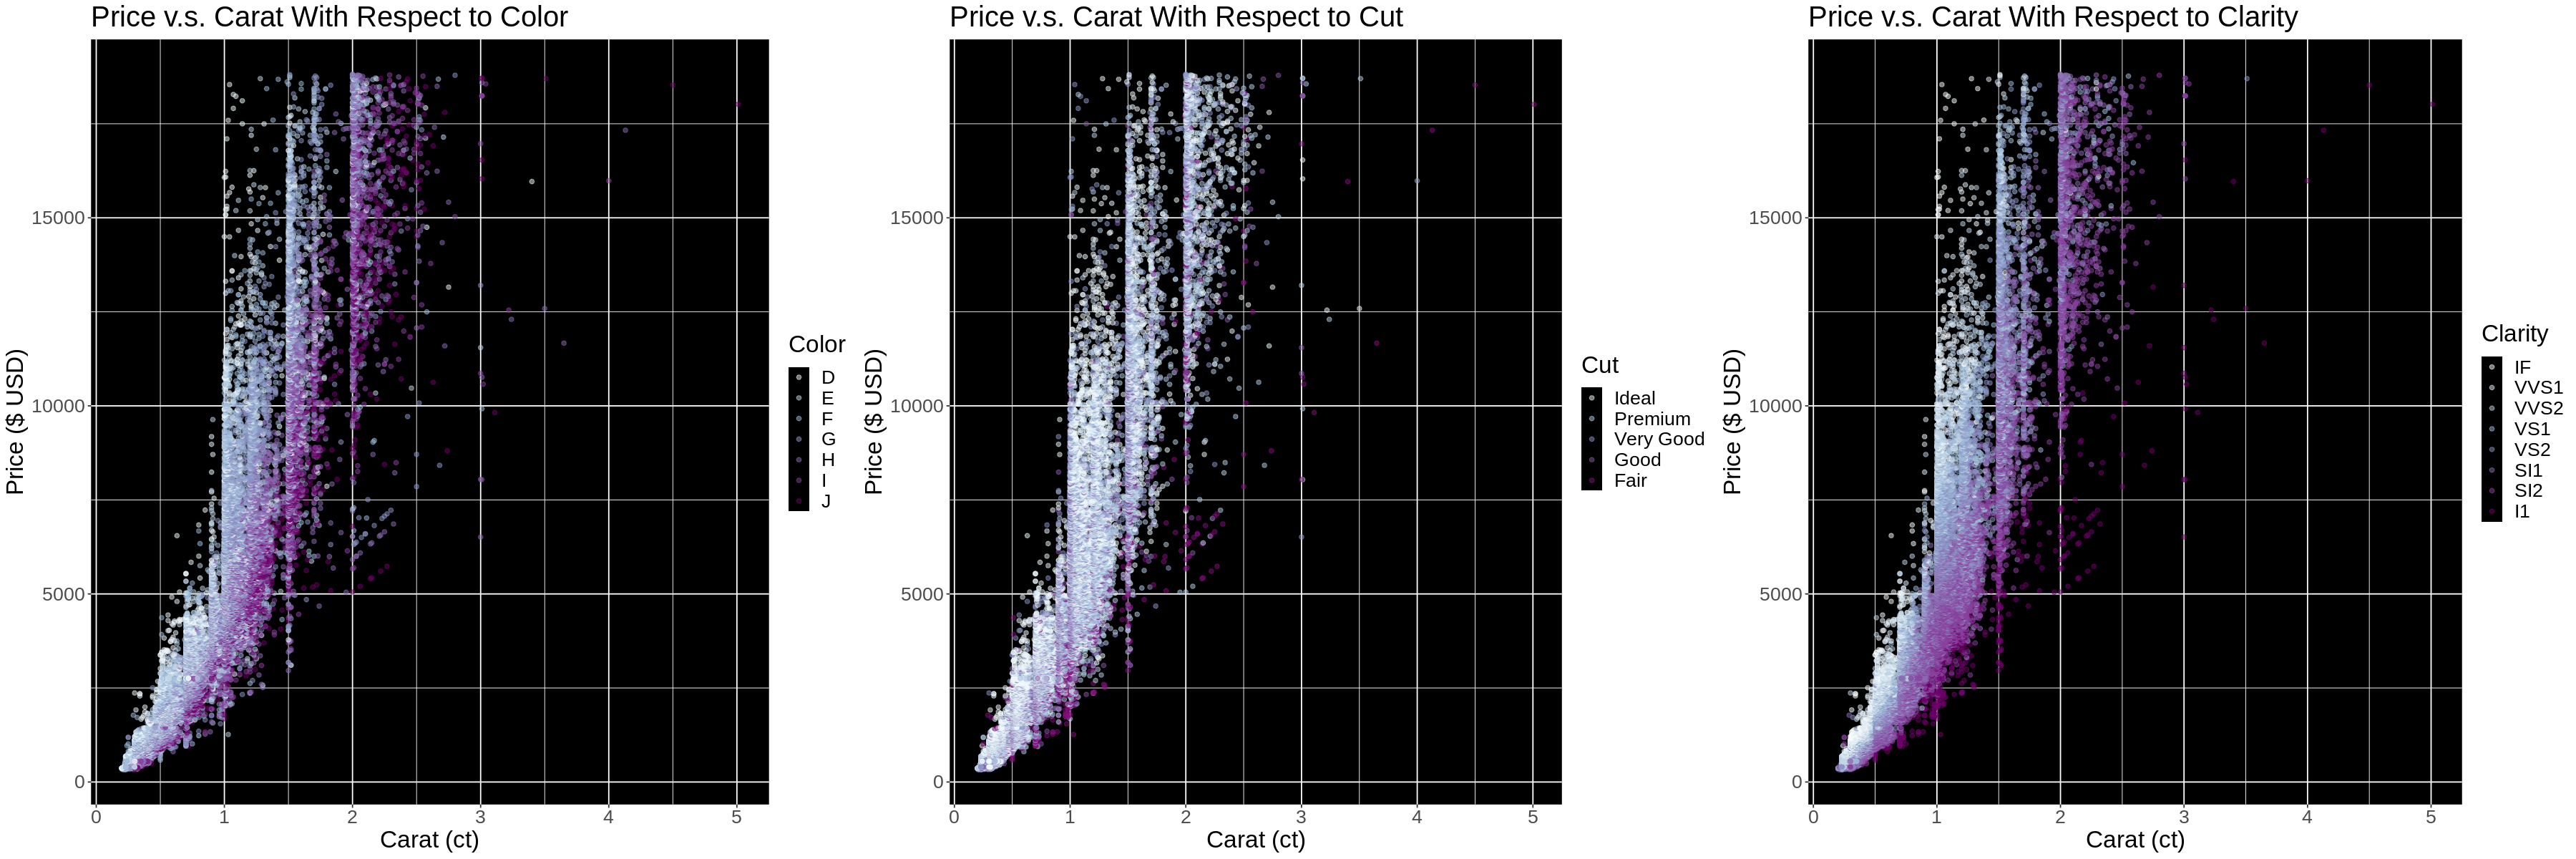

In [11]:
options(repr.plot.width = 30, repr.plot.height = 10)

diamonds_color_plot <- diamonds_train %>% 
    ggplot(aes(x = carat, y = price, color = color)) +
    geom_point(alpha = 0.5) +
    labs(title = "Price v.s. Carat With Respect to Color", x = "Carat (ct)", y = "Price ($ USD)", color = "Color") +
    scale_color_brewer(palette = "BuPu") +
    theme(text = element_text(size=20),
          panel.background = element_rect(fill = "black"),
         legend.key = element_rect(fill = "black"))


diamonds_cut_plot <- diamonds_train %>% 
    ggplot(aes(x = carat, y = price, color = cut)) +
    geom_point(alpha = 0.5) +
    labs(title = "Price v.s. Carat With Respect to Cut", x = "Carat (ct)", y = "Price ($ USD)", color = "Cut") +
    scale_color_brewer(palette = "BuPu") +
    theme(text = element_text(size=20),
          panel.background = element_rect(fill = "black"),
         legend.key = element_rect(fill = "black"))


diamonds_clarity_plot <- diamonds_train %>% 
    ggplot(aes(x = carat, y = price, color = clarity)) +
    geom_point(alpha = 0.5) +
    labs(title = "Price v.s. Carat With Respect to Clarity", x = "Carat (ct)", y = "Price ($ USD)", color = "Clarity") +
    scale_color_brewer(palette = "BuPu") +
    theme(text = element_text(size=20),
          panel.background = element_rect(fill = "black"),
         legend.key = element_rect(fill = "black"))

plot_grid(diamonds_color_plot, diamonds_cut_plot, diamonds_clarity_plot, nrow = 1)

## Methods

A diamond’s value is based on the four Cs; colour, clarity, cut, and carat. Thus, these will be the columns that we use for our project. As we are predicting a numerical value, our model will use the K-nearest neighbours method for regression. Since the carat variable is numerical, we will standardize it. To build our model, we will first split our initial data so that 75% of it will be used in the training data and the remaining 25% for our test data. As this process is random, we will make sure to set a seed so that our code is reproducible. With our training data, we will then apply cross-validation to determine the optimal K value. With the K value determined, we can then build our model.

To visualize our results, we will create 3 graphs all with carat on the x-axes and price on the y-axis. Each graph will visualize one of each three categorical predictors. We will also ensure that our graphs use a colour-blind-friendly palette.




## Expected outcomes and significance:
With our model, we can predict the price of a diamond given a set of properties. Knowing a rough estimate is beneficial to buyers as they can make comparisons with the market price to determine if it is reasonable before purchasing, and can help those selling diamonds list it for what it's worth.

We expect to find a positive, exponential relationship between a diamond’s carat and price in our regression model as larger pieces are harder to find (thus worth substantially more). Additionally, we believe higher quality/less common attributes in the cut, clarity and colour properties will result in more expensive diamonds.

Observations from our regression model can lead to further questions and analyses on why some properties result in greater price contrast, and whether there are other variables not considered that also have significant impacts on diamond prices. For future studies, we may choose to expand our model to account for the other properties, such as a diamond’s table and depth, when predicting diamond prices. 

